In [42]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from torch.utils.data import Dataset, DataLoader
from skimage import io
from torchvision import transforms

In [43]:
dir = 'C:/Users/paxso/galclass_da/gal_img_full/gal_img_full/'
pf = pd.read_csv(dir+"gal_list.csv") 
hsc = pd.read_csv(dir+"hsc_dataframe.csv")
print(df.loc[0, ('label')])

236.2870_-0.5180


In [50]:
class GalaxyDataset(Dataset):
        def __init__(self, csv_file, root_dir, domain, transform=None):
            """
            Arguments:
                df (string): Path to the csv file with annotations.
                root_dir (string): Directory with all the images.
                transform (callable, optional): Optional transform to be applied
                    on a sample.
            """
            self.df = pd.read_csv(csv_file)
            self.root_dir = root_dir
            self.transform = transform
            self.domain = domain
        
        def __len__(self):
            return len(self.df)
        
        def __getitem__(self, i):
            if torch.is_tensor(i):
                i = i.tolist()
            if self.domain == 'source':
                img_name = self.root_dir + str(self.df['label'][i]) + '_sdss.jpg'
            if self.domain == 'target':
                img_name = self.root_dir + 'hsc/' + str(self.df['label'][i]) + '_hscs.jpg'
                
            image = io.imread(img_name)
            label = self.df.loc[i, ('class_num')]
            
            label = np.array([label]).astype('float')#.reshape(-1, 1)
            sample = {'image': image, 'label': label}

            if self.transform:
                sample = self.transform(sample)

            return sample

class ToTensor(object):
    """Convert ndarrays in sample to Tensors."""

    def __call__(self, sample):
        image, label = sample['image'], sample['label']

        # swap color axis because
        # numpy image: H x W x C
        # torch image: C x H x W
        image = image.transpose((2, 0, 1))
        return {'image': torch.from_numpy(image),
                'label': torch.from_numpy(label)}

In [52]:
totensor = ToTensor()
data = GalaxyDataset('C:/Users/paxso/galclass_da/gal_img_full/gal_img_full/hsc_dataframe.csv', dir, 'target', transforms.Compose([ToTensor()]))
print(len(data))
for i in range(100,110):
    sample = data[i]
    image = sample['image']
    label = sample['label']
    print(image.size())
    print(label.size())
target_dataloader = Dataloader(transformed_dataset, batch_size=4,
                        shuffle=True, num_workers=0)

13170
torch.Size([3, 128, 128])
torch.Size([1])
torch.Size([3, 128, 128])
torch.Size([1])
torch.Size([3, 128, 128])
torch.Size([1])
torch.Size([3, 128, 128])
torch.Size([1])
torch.Size([3, 128, 128])
torch.Size([1])
torch.Size([3, 128, 128])
torch.Size([1])
torch.Size([3, 128, 128])
torch.Size([1])
torch.Size([3, 128, 128])
torch.Size([1])
torch.Size([3, 128, 128])
torch.Size([1])
torch.Size([3, 128, 128])
torch.Size([1])


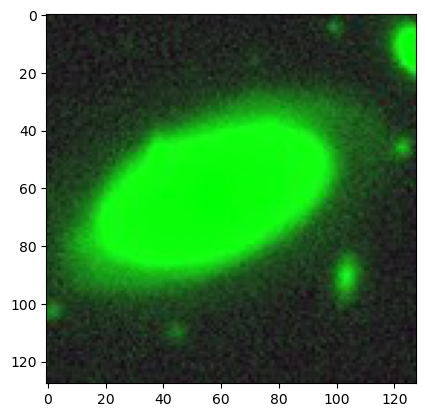

In [37]:
im = Image.open(dir + 'hsc/' + str(hsc['label'][800]) + '_hscs.jpg')
im = np.asarray(im)
plt.imshow(im)

(128, 128, 3)
78.37972983919283


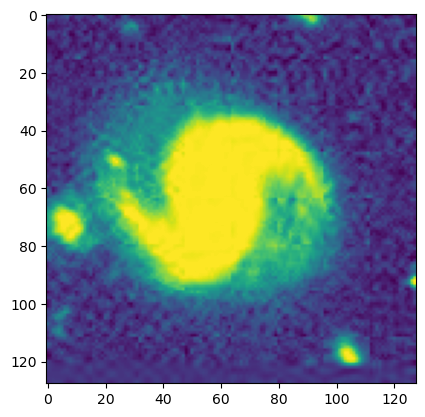

In [89]:
im = Image.open(dir + 'hsc/' + str(hsc['label'][0]) + '_hscs.jpg')
#im = Image.open(dir + 'hsc/' '3.9161_-0.2671_hscs.jpg')
im = np.asarray(im)
print(np.shape(im))
a=0
plt.imshow(im[:,:,a])
lum = 0.21 *im[:,:,0] #+ 0.72 * im[:,:,1] + 0.07 * im[:,:,2]
plt.imshow(lum)
print(np.std(im[:,:,a]))

(128, 128, 3)
69.46840445776938


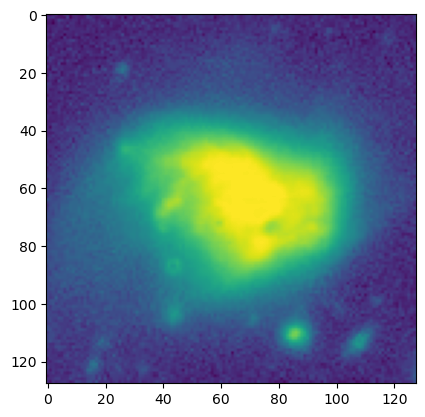

In [83]:
im = Image.open(dir + 'hsc/' + str(test['label'][300]) + '_hscs.jpg')
#im = Image.open(dir + 'hsc/' '3.9161_-0.2671_hscs.jpg')
im = np.asarray(im)
print(np.shape(im))
a=2
plt.imshow(im[:,:,a])
lum = 0.21 *im[:,:,0] + 0.72 * im[:,:,1] + 0.07 * im[:,:,2]
plt.imshow(lum)

(128, 128, 3)
2.160246899469287


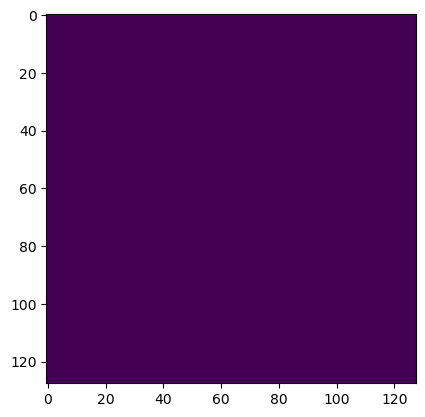

In [8]:
#3.3825_-1.1471_hscs
im = Image.open(dir + 'hsc/' + '3.3825_-1.1471_hscs.jpg')
im = np.asarray(im)
print(np.shape(im))
plt.imshow(im[:,:,2])
#lum = 0.21 *im[:,:,0] + 0.72 * im[:,:,1] + 0.07 * im[:,:,2]
#plt.imshow(im)
print(np.std(im))

In [52]:
print(test[test['label']=='3.9161_-0.2671'].index.values)

[10698]


In [55]:
#print(test.loc[10698])
print(test['g-r'])

0        0.647391
1        0.778241
2        0.742151
3        0.713105
4        0.732895
           ...   
14116    0.894266
14117    0.522381
14118    0.833612
14119    0.871560
14120    0.498267
Name: g-r, Length: 14121, dtype: float64


(128, 128, 3)


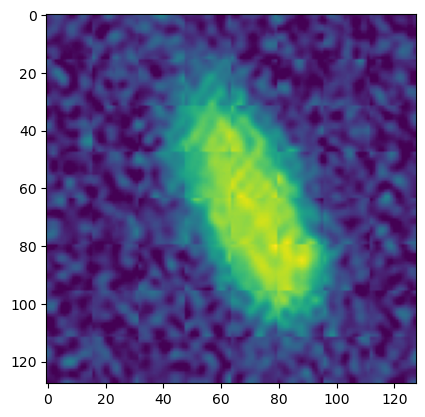

In [10]:
im = Image.open(dir + str(df['label'][0]) + '_sdss.jpg')
im = np.asarray(im)
print(np.shape(im))
plt.imshow(im[:,:,2])

In [ ]:
'_sdss.jpg',